<a href="https://colab.research.google.com/github/OctavioSantalucia/econometria/blob/main/ejercicios/Airbnb_Test_de_hip%C3%B3tesis%20Resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analisis de efectos de número de reviews en valor de oferta

In [ ]:
import pandas as pd
import statsmodels.api as sm

In [ ]:
df=pd.read_excel('https://github.com/rpasquini/econometria/blob/main/datos/listings_26_dic_2023.xlsx?raw=True', sheet_name='listings', engine='openpyxl')


In [ ]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11508,https://www.airbnb.com/rooms/11508,20231226203815,2023-12-29,city scrape,Condo in Buenos Aires Â· â˜…4.79 Â· 1 bedroom ...,NaN,AREA: PALERMO SOHO<br /><br />Minutes walking ...,https://a0.muscache.com/pictures/19357696/b1de...,42762.0,...,4.97,4.92,4.87,NaN,f,1.0,1.0,0.0,0.0,0.28
1,14222,https://www.airbnb.com/rooms/14222,20231226203815,2023-12-28,city scrape,Rental unit in Palermo/Buenos Aires Â· â˜…4.77...,NaN,Palermo is such a perfect place to explore the...,https://a0.muscache.com/pictures/4695637/bbae8...,87710233.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15074,https://www.airbnb.com/rooms/15074,20231226203815,2023-12-29,previous scrape,Rental unit in Buenos Aires Â· 1 bedroom Â· 1 ...,NaN,NaN,https://a0.muscache.com/pictures/91166/c0fdcb4...,59338.0,...,NaN,NaN,NaN,NaN,f,1.0,0.0,1.0,0.0,NaN
3,16695,https://www.airbnb.com/rooms/16695,20231226203815,2023-12-28,city scrape,Loft in Buenos Aires Â· â˜…4.28 Â· 1 bedroom Â...,NaN,San Telmo is one of the best neighborhoods in ...,https://a0.muscache.com/pictures/619c33a9-0618...,64880.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20062,https://www.airbnb.com/rooms/20062,20231226203815,2023-12-28,city scrape,Rental unit in Buenos Aires Â· â˜…4.93 Â· 2 be...,NaN,NaN,https://a0.muscache.com/pictures/165679/2eb448...,75891.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(33490, 75)

In [ ]:
df.columns


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [ ]:
df["number_of_reviews"].describe()

count    23562.000000
mean        19.536117
std         33.965207
min          0.000000
25%          1.000000
50%          7.000000
75%         23.000000
max        560.000000
Name: number_of_reviews, dtype: float64

<Axes: >

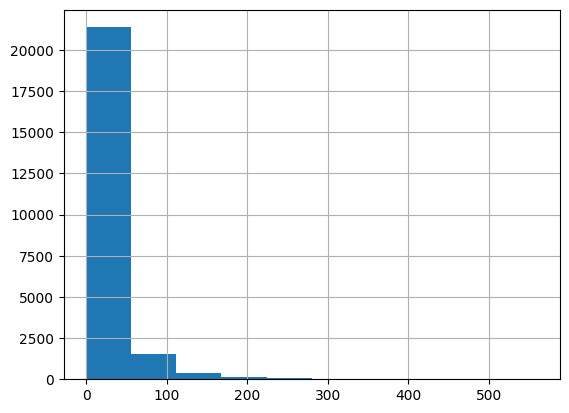

In [ ]:
df["number_of_reviews"].hist()

<Axes: >

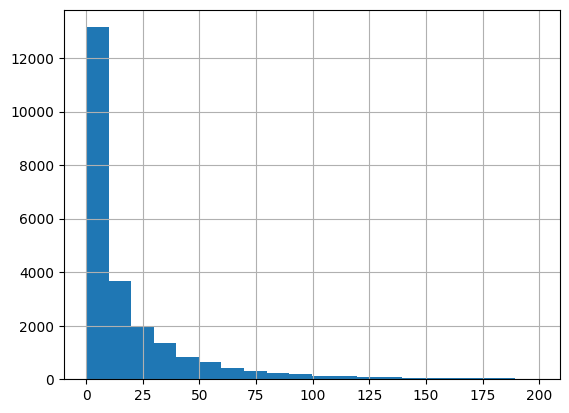

In [ ]:
df[df["number_of_reviews"]<200]["number_of_reviews"].hist(bins=20)

In [ ]:
df["price"].describe()

count          22803
unique          4961
top       $32,242.00
freq             332
Name: price, dtype: object

In [ ]:
# podemos ver que es un string
df["price"][0]

'$96,921.00'

In [ ]:
#Corrijo el formato de los precios
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

In [ ]:
df["price"][0]

96921.0

count    2.280300e+04
mean     5.820377e+04
std      6.920446e+05
min      5.000000e+02
50%      3.154900e+04
95%      1.047870e+05
max      7.995942e+07
Name: price, dtype: float64

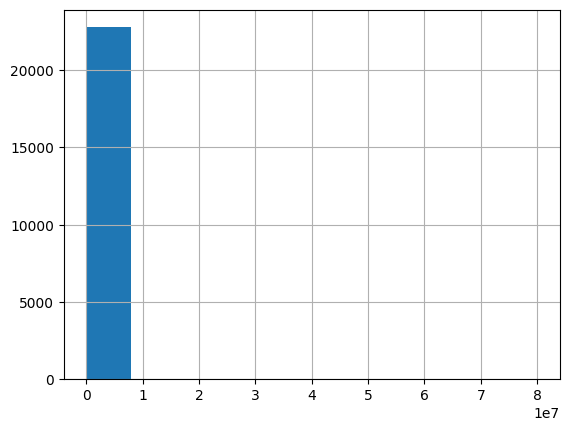

In [ ]:
# Quitando outliers del precio
df["price"].hist()
df["price"].describe(percentiles=[0.95])

<Axes: >

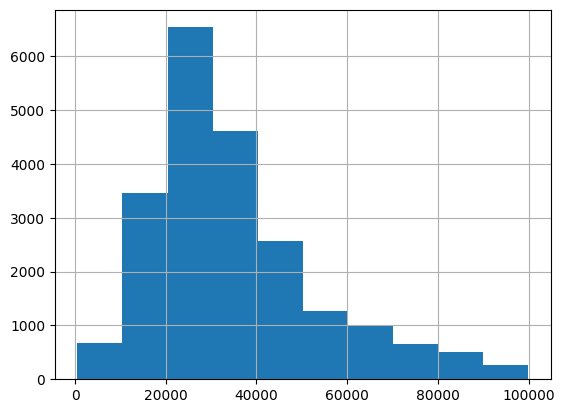

In [ ]:
# podemos ver que es una distribución más razonable antes de 100 mil
df[df["price"]<100000]['price'].hist()

In [ ]:
# filtrando el dataframe solo para valores menores a 100 mil
df=df[df["price"]<100000]

In [ ]:
def regress(lista, data):
  """
  Funcion que realiza la regresion OLS
  La primera variable de la lista es la dependiente, el resto son las explicativas
  data es la base de datos
  """
  datos=data[lista]
  # el metodo dropna() me permite eliminar las filas que tienen algun valor missing
  datos=datos.dropna()
  Y=datos[lista[0]]
  X=datos[lista[1:]]
  X=sm.add_constant(X)
  modelo=sm.OLS(Y,X)
  resultados=modelo.fit()
  print(resultados.summary())
  return resultados


In [ ]:
regress(['price','number_of_reviews'], df)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     26.53
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           2.61e-07
Time:                        14:05:59   Log-Likelihood:            -2.4183e+05
No. Observations:               21531   AIC:                         4.837e+05
Df Residuals:                   21529   BIC:                         4.837e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3.465e+04    144.02

“La estimación del modelo sugiere un **aumento** de, en promedio, alrededor de **18** pesos de alquiler, por cada review adicional, ceteris paribus”

![image_2024-04-08_103336488.png](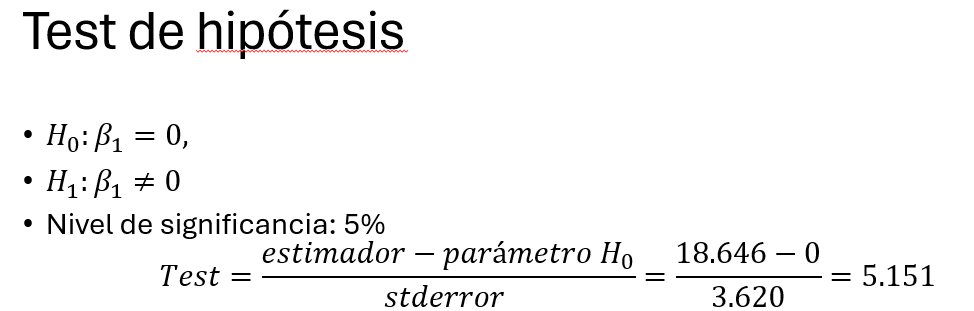![image_2024-04-08_103417601.png](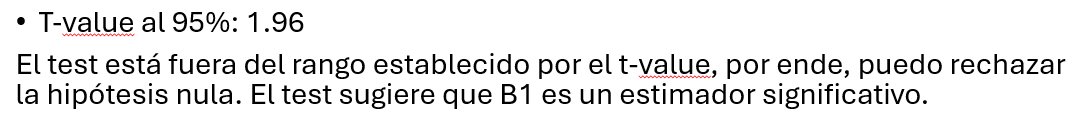![image_2024-04-08_103447104.png](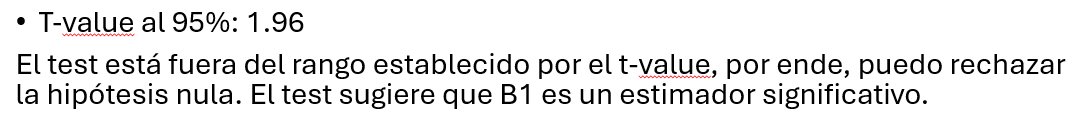![image_2024-04-08_103504305.png](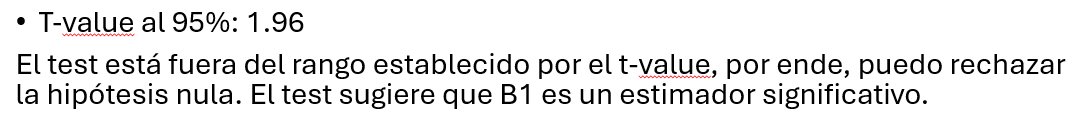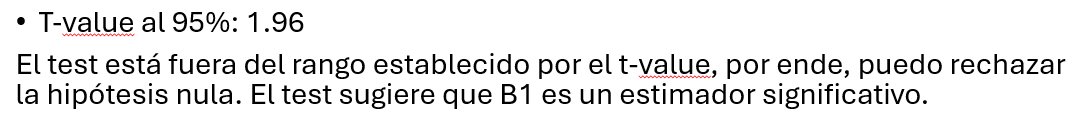))))

## Test de hipótesis: identificando zona de rechazo

In [ ]:
#Calculo el t-value
from scipy.stats import t

# Defino nivel de confianza
confidence_level = 0.95

# Defino los grados de libertad (n)
degrees_of_freedom = 21529  # Adjust this according to your data

# Encuentro el t-value (a 2 colas)
t_rechazo = t.ppf((1 + confidence_level) / 2, degrees_of_freedom)

print("t-rechazo:", t_rechazo)

t-value: 1.960074180198839


Valor T de rechazo al 95%: 1.96.
El valor T del coeficiente de regresión: 5.15

Por lo tanto el valor de T del coeficiente quedó en la zona de rechazo, y  po ende, puedo rechazar la hipótesis nula. Se dice que el test sugiere que "number of reviews es un estimador significativo".

## Tests de Hipótesis: Diagnostico usando P-valor  

In [ ]:
#Calculo el p-value
probability = 2*(1-t.cdf(5.151, 21531))

print("P-value:", probability)

P-value: 2.6138462727587353e-07


P-value: El p-value es menor que el nivel de significancia, puedo rechazar la hipótesis nula.